In [107]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [108]:
df = pd.read_csv("../data/boston_housing.csv")

In [109]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [110]:
# define X & y
X = df.iloc[:,:-1]
y = df['PRICE']
# standardize data
X = (X - X.mean()) / X.std()
# fit model
lreg = LinearRegression()
lreg.fit(X, y)
lreg.score(X, y)

0.7406426641094095

In [111]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [15]:
lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

In [19]:
coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Weight'  : lreg.coef_,
    'Weight_abs':abs(lreg.coef_)
}).sort_values(by='Weight_abs', ascending=False)
coeffs

,Variable,Weight,Weight_abs
12,LSTAT,-3.747332,3.747332
7,DIS,-3.107116,3.107116
5,RM,2.676877,2.676877
8,RAD,2.664852,2.664852
9,TAX,-2.078837,2.078837
10,PTRATIO,-2.062646,2.062646
4,NOX,-2.058754,2.058754
1,ZN,1.082639,1.082639
0,CRIM,-0.929065,0.929065
11,B,0.850109,0.850109


In [20]:
import seaborn as sns

In [21]:
df['Prediction'] = lreg.predict(X)

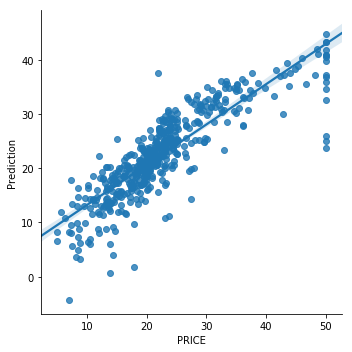

In [23]:
sns.lmplot(x = 'PRICE', y = 'Prediction', data = df )

In [24]:
from sklearn.model_selection import train_test_split

In [94]:
y = np.log1p(y)

In [95]:
y.head()

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: PRICE, dtype: float64

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .2, random_state = 2019 ) # below 50K rows

In [119]:
X_train.shape

(404, 13)

In [120]:
X_test.shape

(102, 13)

In [34]:
y_train.shape, y_test.shape

((404,), (102,))

In [35]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
print('Trainint score: ', lreg.score(X_train, y_train), "\nTest score:", lreg.score(X_test, y_test))

Trainint score:  0.7581321815069204 
Test score: 0.617406599912789


In [75]:
### cross validation
from sklearn.model_selection import cross_val_score

In [43]:
score = cross_val_score(estimator = lreg, X = X_train, y = y_train, cv = 10)

In [44]:
score

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [46]:
score.mean()

0.7275668192780949

In [54]:
### regid and lass

In [62]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
rreg = Ridge()

In [56]:
coefs = []

In [58]:
import numpy as np

In [63]:
alphas = np.logspace(-6, 6, 200)

In [70]:
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [66]:
alphas = np.logspace(-4, 4, 9)

In [126]:
alphas

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [122]:
rreg_scores = []

In [123]:
for alpha in alphas:
    rreg.set_params(alpha = alpha)
    scores = cross_val_score(estimator = rreg, X = X_train, y = y_train, cv = 10)
    rreg_scores.append((np.mean(scores), alpha))

In [124]:
rreg_scores

[(0.727566856150162, 0.0001),
 (0.7275671879706753, 0.001),
 (0.7275705033965967, 0.01),
 (0.7276033814997226, 0.1),
 (0.7279062063838936, 1.0),
 (0.7293451128274094, 10.0),
 (0.7160513604724722, 100.0),
 (0.5068823074169994, 1000.0),
 (0.11460336381499511, 10000.0)]

In [125]:
max(rreg_scores)

(0.7293451128274094, 10.0)

In [115]:
y_train.head()

249    3.303217
51     3.068053
151    3.025291
486    3.000720
235    3.218876
Name: PRICE, dtype: float64

In [116]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [121]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
249,-0.397928,0.456057,-0.769170,-0.272329,-1.067462,0.616788,-1.814457,1.914536,-0.292791,-0.464213,0.297683,0.406003,-0.853243
51,-0.415060,0.413180,-0.801238,-0.272329,-0.998424,-0.241432,-0.198051,1.434033,-0.637331,-0.980420,-0.764700,0.408522,-0.451342
151,-0.246142,-0.487240,1.230727,-0.272329,2.729645,-1.253363,1.116390,-1.046413,-0.522484,-0.031074,-1.734701,-0.165114,0.087793
486,0.241611,-0.487240,1.014995,-0.272329,0.244266,-0.242855,0.398776,-0.118318,1.659603,1.529413,0.805778,0.394392,0.325853
235,-0.381684,-0.487240,-0.719610,-0.272329,-0.411598,-0.282706,-0.251339,-0.067978,-0.177944,-0.600682,-0.487557,0.219902,-0.248291


In [91]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,Prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


In [127]:
from sklearn.linear_model import Lasso
lareg = Lasso()

In [128]:
rreg_scores = []
for alpha in alphas:
    lareg.set_params(alpha = alpha)
    scores = cross_val_score(estimator = lareg, X = X_train, y = y_train, cv = 10)
    rreg_scores.append((np.mean(scores), alpha))

In [129]:
lareg

Lasso(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [130]:
rreg_scores

[(0.7275739415133402, 0.0001),
 (0.7276369368540607, 0.001),
 (0.728162494438621, 0.01),
 (0.7238600727735414, 0.1),
 (0.667213882310359, 1.0),
 (-0.04539775084137321, 10.0),
 (-0.04539775084137321, 100.0),
 (-0.04539775084137321, 1000.0),
 (-0.04539775084137321, 10000.0)]

In [131]:
max(rreg_scores)

(0.728162494438621, 0.01)